In [1]:
import random
random.seed(0)

import numpy as np
random.seed(0)

import tensorflow as tf
random.seed(0)

In [2]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
type(train_images)

numpy.ndarray

In [5]:
type(train_labels)

numpy.ndarray

In [8]:
len(test_images)

10000

In [11]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

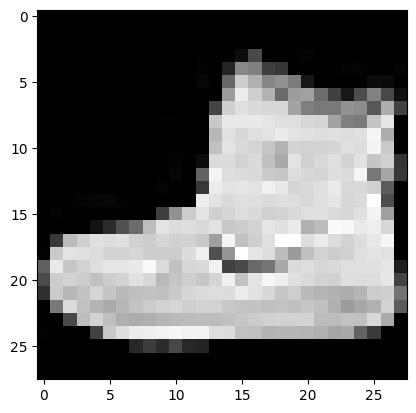

In [12]:
#Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [13]:
print(train_labels[0])

9


In [14]:
#Normalize pixel values to be between 0 and 1
train_images, test_images = train_images/255, test_images/255

In [15]:
#Reshape images to specify that it is a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28,28,1))
test_images = test_images.reshape((test_images.shape[0], 28,28,1))

In [17]:
test_images.shape

(10000, 28, 28, 1)

**Convolutional Neural Network**

In [20]:
#Build the CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#Add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [23]:
#compile and train model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [24]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 15s 5ms/step - loss: 0.4995 - accuracy: 0.8174 - val_loss: 0.3706 - val_accuracy: 0.8657
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3229 - accuracy: 0.8829 - val_loss: 0.3309 - val_accuracy: 0.8820
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2757 - accuracy: 0.8984 - val_loss: 0.2860 - val_accuracy: 0.8986
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2474 - accuracy: 0.9070 - val_loss: 0.2783 - val_accuracy: 0.8990
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2214 - accuracy: 0.9175 - val_loss: 0.2769 - val_accuracy: 0.8990


In [25]:
#Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy', test_acc)

313/313 - 1s - loss: 0.2769 - accuracy: 0.8990 - 653ms/epoch - 2ms/step

Test accuracy 0.8989999890327454


Text(0, 0.5, 'accuracy')

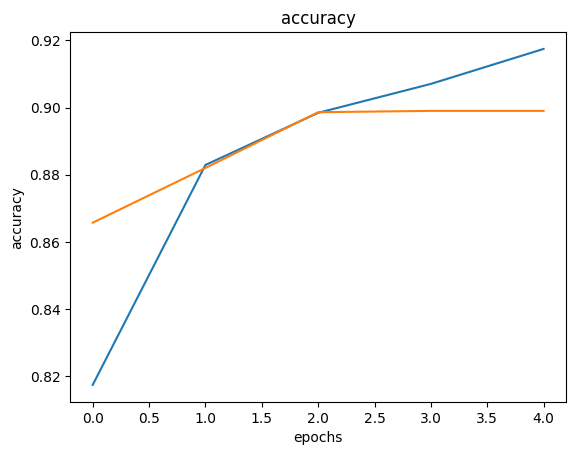

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')

Text(0, 0.5, 'loss')

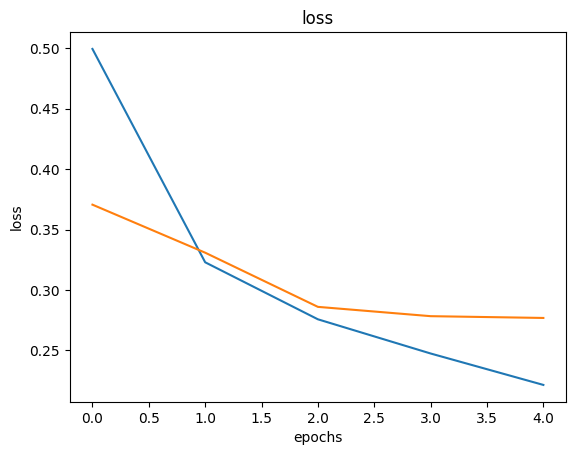

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("loss")
plt.xlabel('epochs')
plt.ylabel('loss')

In [26]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
